In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
base_case = hydro_opt()

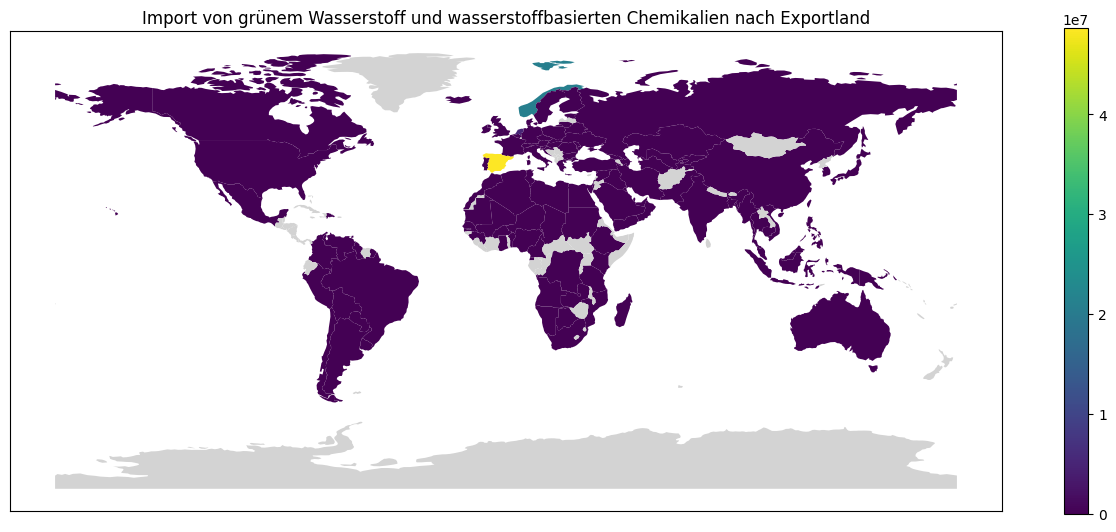

In [3]:
# Initialisieren des Modells mit Standardparametern
base_case = hydro_opt()
# Optimierung des Modells
base_case.optimize()
# beispielhafter Zugriff auf die abgespeicherten Ergebnisse als pandas DataFrame
results = base_case.results_df
# Abspeichern der Ergebnisse als csv mit deutschen Dezimaltrennzeichen
results.to_csv("Ergebnisse.csv", sep=";", decimal=",")
# Visualisierng des Modells
base_case.visualize()

In [4]:
base_case_opt = base_case.optimize(return_model=True, return_as_df=True)

ERROR: Unable to clone Pyomo component attribute. Component 'obj' contains an
uncopyable field '_init_sense' (<class
'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to `None`
on new object


#base_case_opt.to_csv("Ergebnisse Basis Szenario.csv", sep=";", decimal=",")
base_case_opt

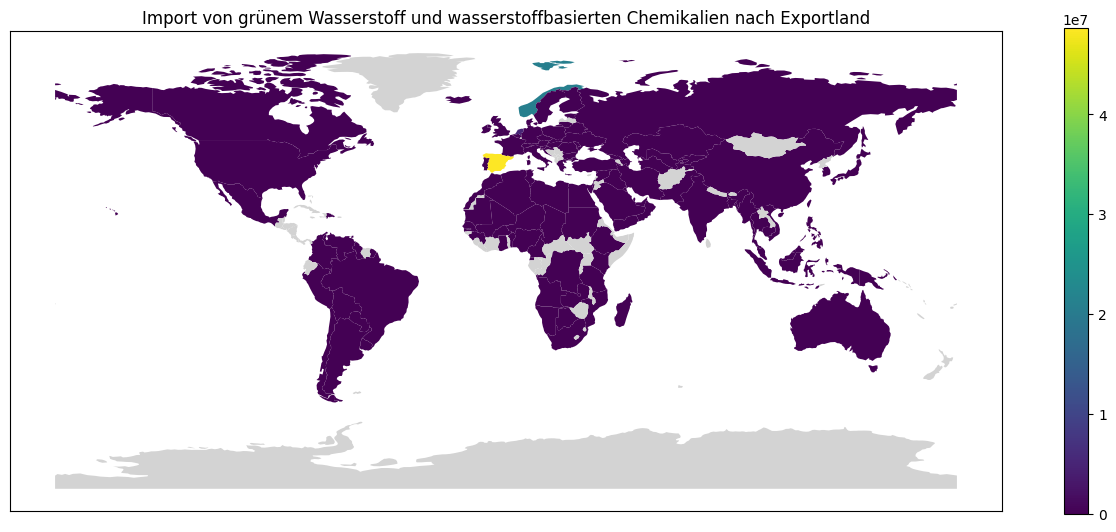

In [5]:
base_case.visualize()
plt.savefig("Basis Szenario - Alles")

base_case.visualize(vis_style="bar")
plt.savefig("Basis Szenario - Alles - Bar")

base_case.visualize(what="commodities", figsize=(8,8))
#plt.savefig("Basis Szenario - Chemikalien")

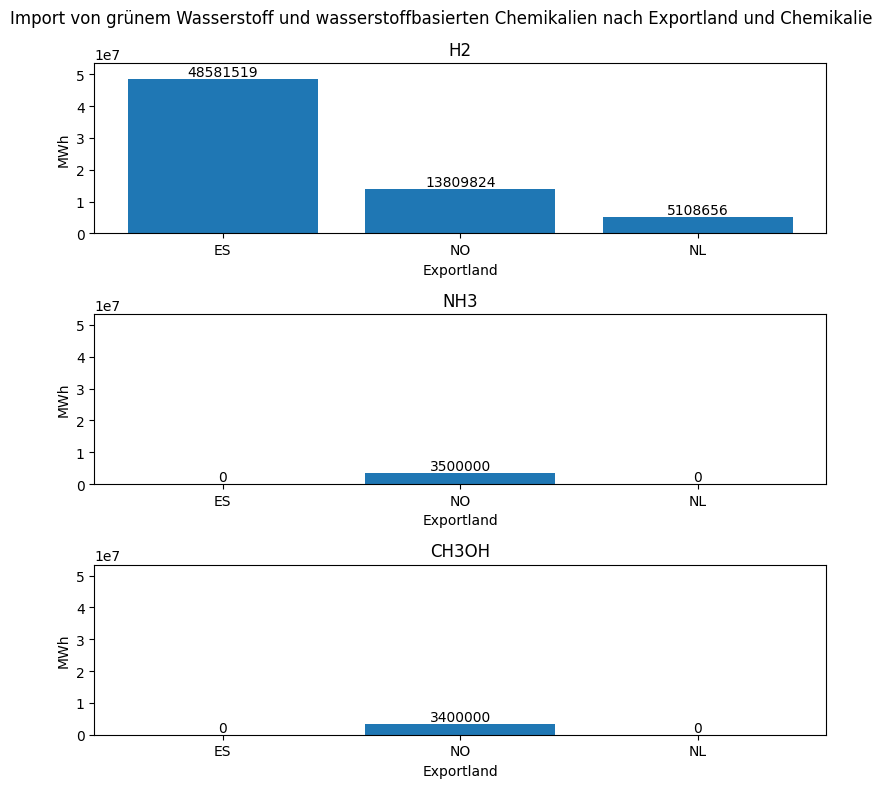

In [6]:
base_case.visualize(what="commodities", vis_style="bar", figsize=(8,8))
#plt.savefig("Basis Szenario - Chemikalien - Bar")
plt.savefig('Basis Szenario - Chemikalien - Bar', bbox_inches="tight")

base_case.visualize(what="hydrogen_conversion")
plt.savefig("Basis Szenario - Wasserstoff Detail")

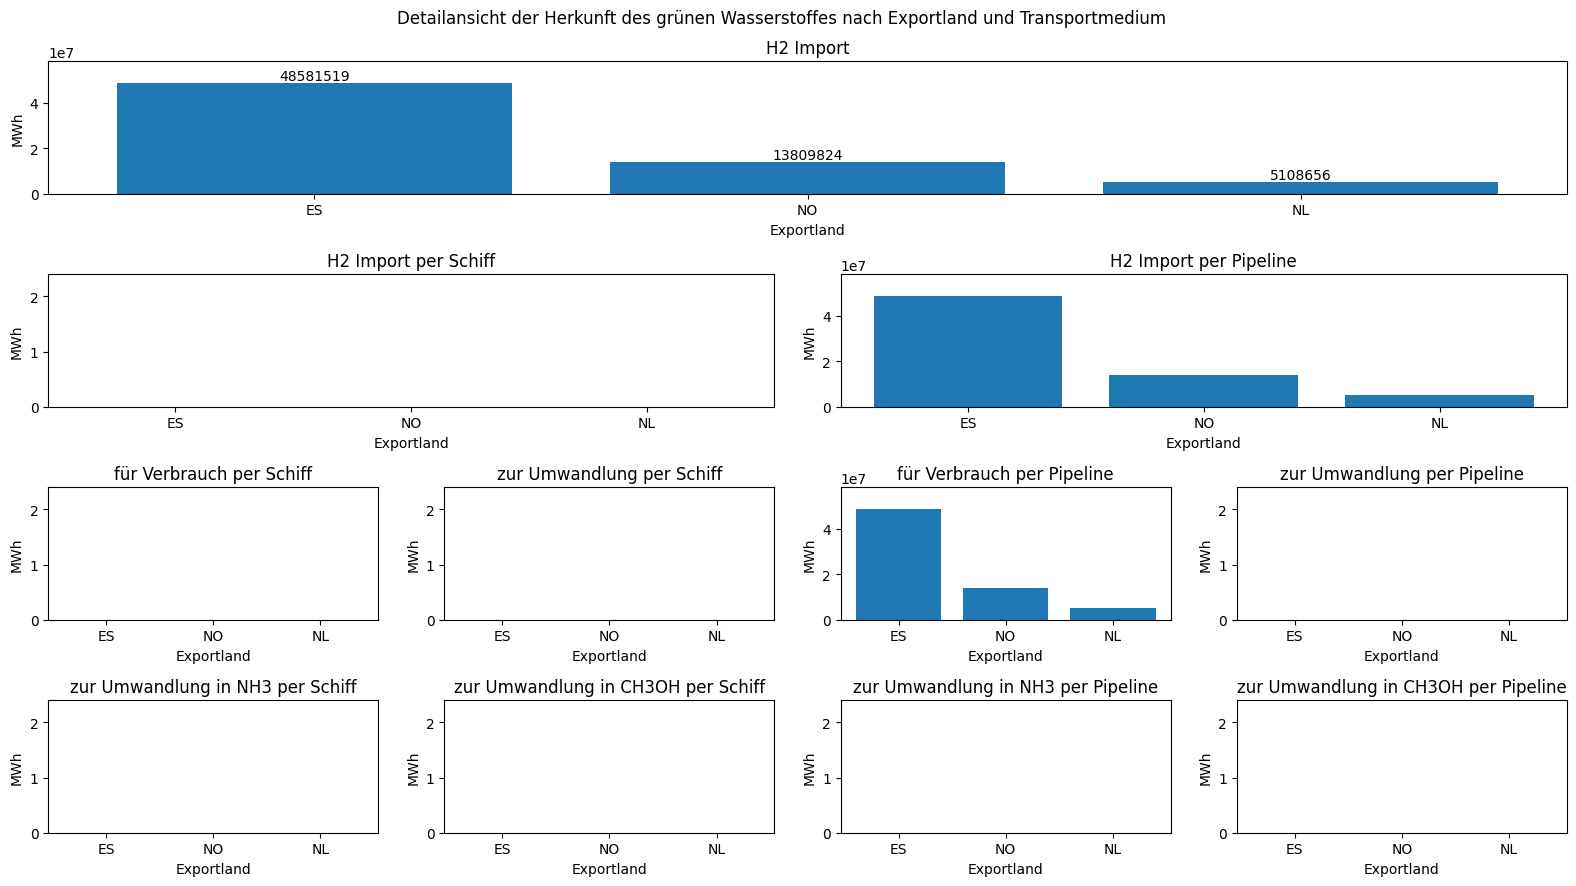

In [7]:
base_case.visualize(what="hydrogen_conversion", vis_style="bar")
plt.savefig("Basis Szenario - Wasserstoff Detail - Bar")

In [8]:
base_case_import_limit = hydro_opt(use_import_limits=True)

In [9]:
base_case_import_limit_opt = base_case_import_limit.optimize(return_model=True)

base_case_import_limit.visualize()

base_case_import_limit.visualize(what = "commodities", vis_style = "bar")

base_case_import_limit.visualize(what="hydrogen_conversion", vis_style="bar")

# Demonstration of different Visualisations based on the acces of .results_df

In [10]:
imported_quantities_base_case = base_case.results_df[['H2 Schiff', 'H2 Pipeline',
                                                      'H2 zu NH3 Schiff', 'H2 zu NH3 Pipeline', 'H2 zu CH3OH Schiff', 'H2 zu CH3OH Pipeline',
                                                      'NH3 Schiff', 'NH3 Pipeline', 'CH3OH Schiff', 'CH3OH Pipeline']]

In [11]:
imported_quantities_base_case_with_import_limits = base_case_import_limit.results_df[['H2 Schiff', 'H2 Pipeline',
                                                                                      'H2 zu NH3 Schiff', 'H2 zu NH3 Pipeline', 'H2 zu CH3OH Schiff', 'H2 zu CH3OH Pipeline',
                                                                                      'NH3 Schiff', 'NH3 Pipeline', 'CH3OH Schiff', 'CH3OH Pipeline']]

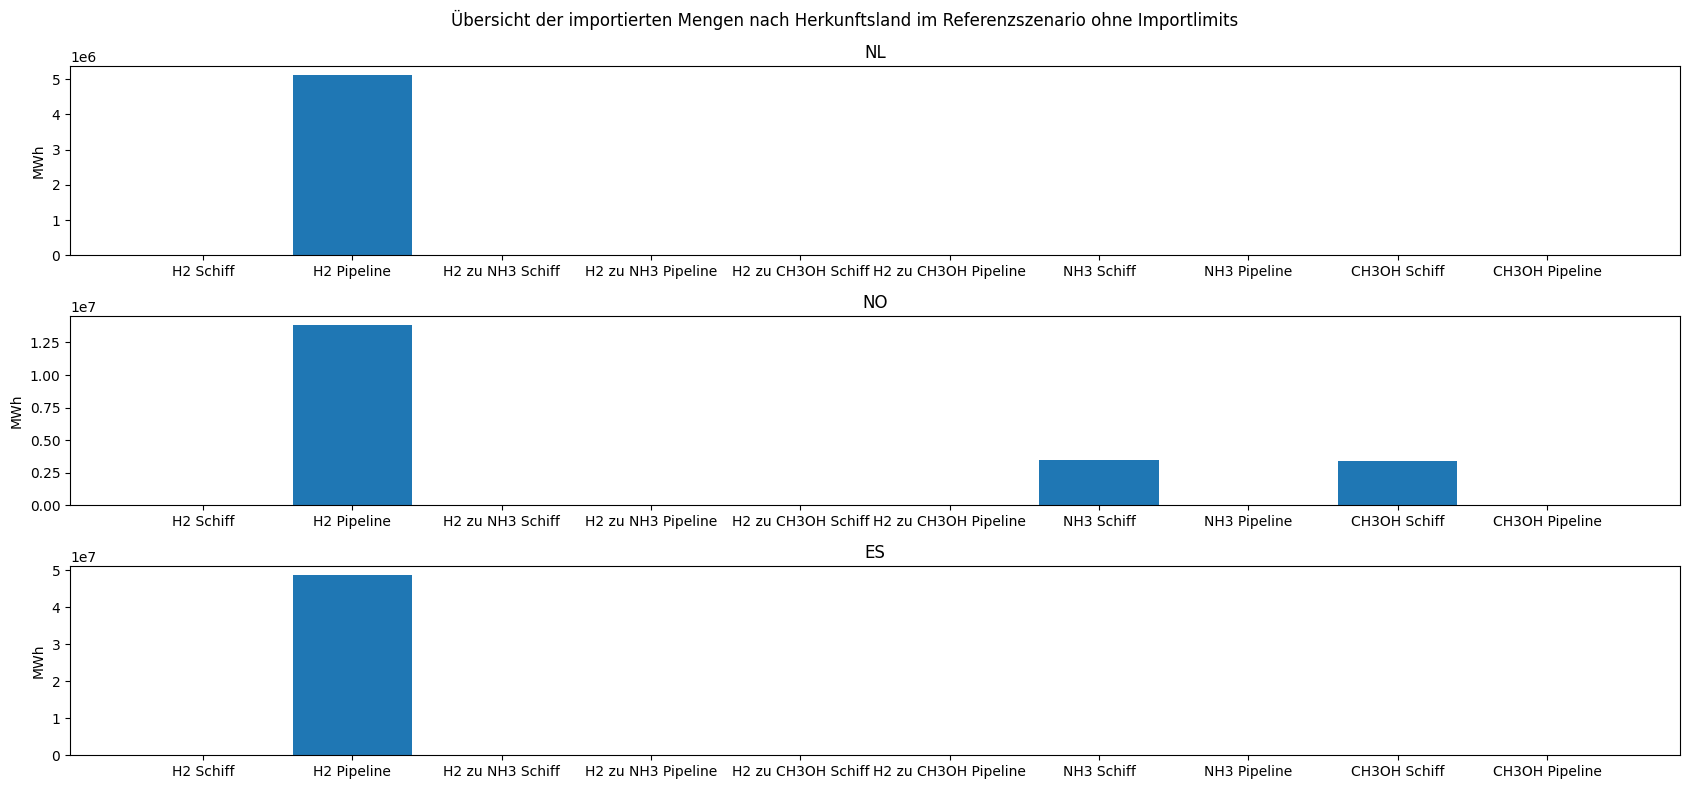

In [12]:
df = imported_quantities_base_case[(imported_quantities_base_case > 0).any(axis=1)]
fig, ax = plt.subplots(3, 1, figsize=(17,8))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario ohne Importlimits")
for i in range(len(df)):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()
plt.savefig("Basis Szenario - importierte Mengen ohne Importlimits", bbox_inches="tight")

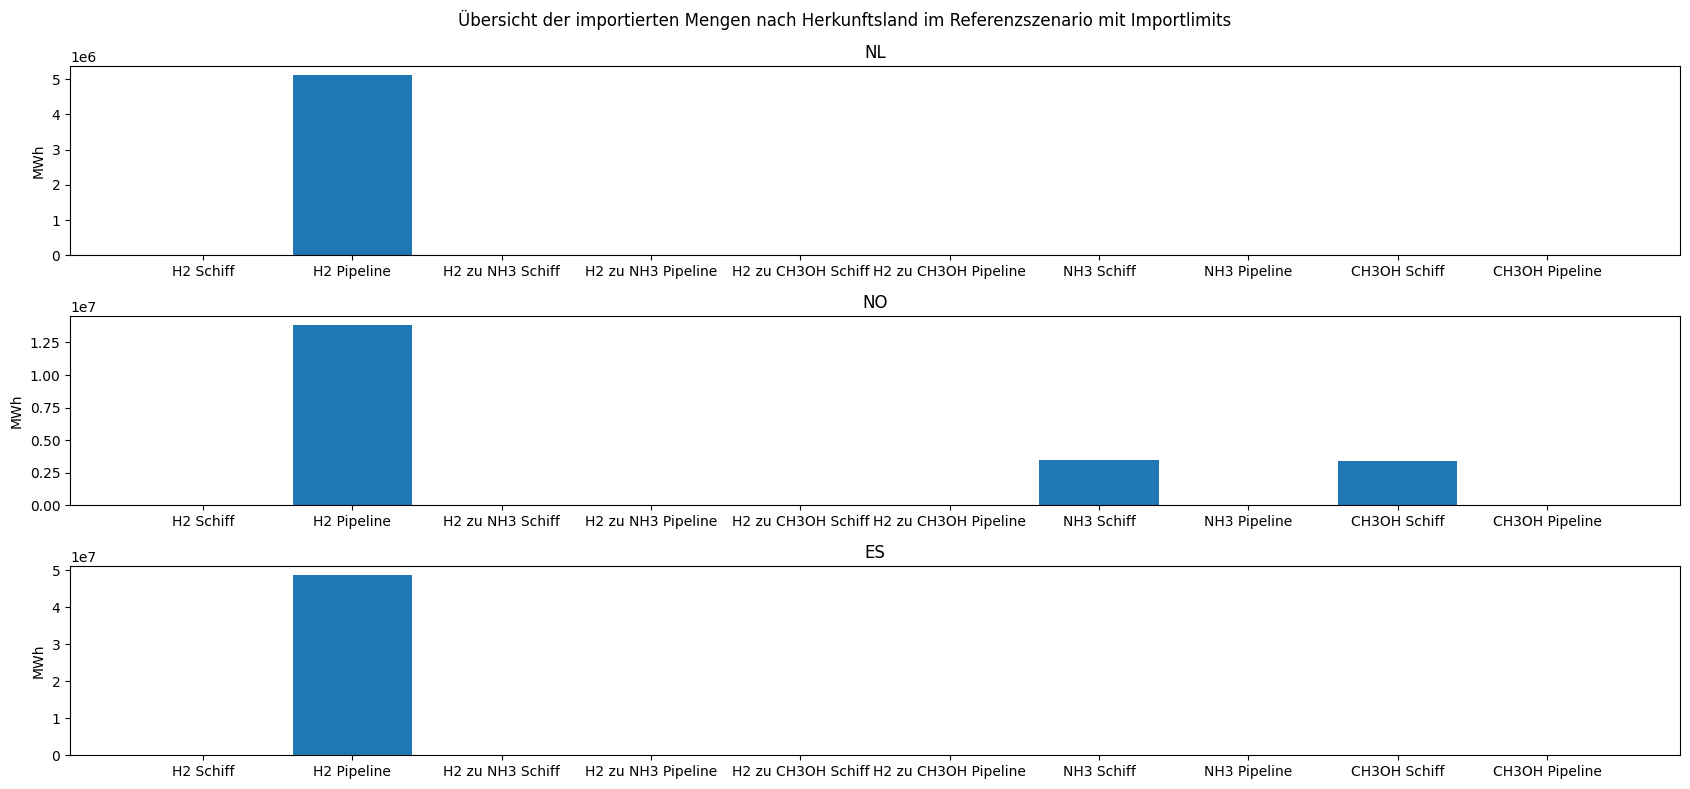

In [13]:
df = imported_quantities_base_case_with_import_limits[(imported_quantities_base_case_with_import_limits > 0).any(axis=1)]
fig, ax = plt.subplots(3, 1, figsize=(17,8))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario mit Importlimits")
for i in range(len(df)):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()
plt.savefig("Basis Szenario - importierte Mengen mit Importlimits", bbox_inches="tight")

# Acces of the model results via .instance

base_case.instance.display()

In [27]:
base_case_import_limit.instance.display()

Model unknown

  Variables:
    h2_amount_ship : Size=113, Index=h2_amount_ship_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
         AE :     0 :   0.0 :  None : False : False : NonNegativeReals
         AO :     0 :   0.0 :  None : False : False : NonNegativeReals
         AR :     0 :   0.0 :  None : False : False : NonNegativeReals
         AT :     0 :   0.0 :  None : False : False : NonNegativeReals
         AU :     0 :   0.0 :  None : False : False : NonNegativeReals
         AZ :     0 :   0.0 :  None : False : False : NonNegativeReals
         BD :     0 :   0.0 :  None : False : False : NonNegativeReals
         BE :     0 :   0.0 :  None : False : False : NonNegativeReals
         BF :     0 :   0.0 :  None : False : False : NonNegativeReals
         BG :     0 :   0.0 :  None : False : False : NonNegativeReals
         BH :     0 :   0.0 :  None : False : False : NonNegativeReals
         BJ :     0 :   0.0 :  None : False : False : NonNegativeReals
 

In [22]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
base_case.results_df.sum()

H2 Schiff                             0.00
H2 Pipeline                  67,500,000.00
H2 zu NH3 Schiff                      0.00
H2 zu NH3 Pipeline                    0.00
H2 für NH3 Umwandlung                 0.00
H2 zu CH3OH Schiff                    0.00
H2 zu CH3OH Pipeline                  0.00
H2 für CH3OH Umwandlung               0.00
H2 für Umwandlung                     0.00
H2 Import                    67,500,000.00
NH3 Schiff                    3,500,000.00
NH3 Pipeline                          0.00
NH3 Import                    3,500,000.00
CH3OH Schiff                  3,400,000.00
CH3OH Pipeline                        0.00
CH3OH Import                  3,400,000.00
Gesamter Import              74,400,000.00
H2 Gesamt Schiff                      0.00
H2 Gesamt Pipeline           67,500,000.00
H2 für Umwandlung Schiff              0.00
H2 für Umwandlung Pipeline            0.00
dtype: float64

In [24]:
base_case.results_df.loc[["ES","NO","NL"]]

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,...,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import,H2 Gesamt Schiff,H2 Gesamt Pipeline,H2 für Umwandlung Schiff,H2 für Umwandlung Pipeline
Code,,,,,,,,,,,,,,,,,,,,,
ES,0.00,"48,581,519.06",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"48,581,519.06",...,0.00,0.00,0.00,0.00,0.00,"48,581,519.06",0.00,"48,581,519.06",0.00,0.00
NO,0.00,"13,809,824.88",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"13,809,824.88",...,0.00,"3,500,000.00","3,400,000.00",0.00,"3,400,000.00","20,709,824.88",0.00,"13,809,824.88",0.00,0.00
NL,0.00,"5,108,656.07",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,108,656.07",...,0.00,0.00,0.00,0.00,0.00,"5,108,656.07",0.00,"5,108,656.07",0.00,0.00
